<a href="https://colab.research.google.com/github/ZoubirCHATTI/02__Probability-Statisitics/blob/main/01_Basis%20statistics/02_The_power_of_estimators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The power of estimators**

This notebook demonstrates the power of using unbiased estimators in data analysis. The first mini-project investigates the importance of Bessel’s correction in variance estimation. The dataset used contains information on the average power consumption in the industrial sector of the Île-de-France region in France. It includes the number of industrial sites in each department (“Nb sites”) and the average consumption per site (“Conso moyenne (MWh)”).

In [12]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [14]:
#Adding the path to the data
path='/content/gdrive/MyDrive/FOR NEXA/Electricity consumption/data/idf.xlsx'

In [15]:
#Uploading and reading the data file
df=pd.read_excel(path)

In [16]:
#Visual inspection of data
df.head()

,OPERATEUR,FILIERE,Année,Code Commune,Nom Commune,Code EPCI,Nom EPCI,Type EPCI,Code Département,Nom Département,...,Superficie des logements 80 à 100 m2,Superficie des logements >100 m2,Résidences principales avant 1919,Résidences principales de 1919 à 1945,Résidences principales de 1946 à 1970,Résidences principales de 1971 à 1990,Résidences principales de 1991 à 2005,Résidences principales de 2006 à 2015,Résidences principales après 2016,Taux de chauffage électrique
0,Enedis,Electricité,2023,91103,Brétigny-sur-Orge,200057859,CA Cœur d'Essonne Agglomération,CA,91,Essonne,...,2242.601579,1855.177616,230.607112,350.738539,2742.218647,3263.869630,2342.970317,1667.533849,1.740614e+02,1.535143
1,Enedis,Electricité,2023,95250,Fosses,200055655,CA Roissy Pays de France,CA,95,Val-d'Oise,...,1323.000000,838.000000,26.000000,141.000000,588.000000,2019.000000,422.000000,254.000000,9.700000e+01,0.737975
2,Enedis,Electricité,2023,95026,Asnières-sur-Oise,200073013,CC Carnelle Pays-de-France,CC,95,Val-d'Oise,...,251.115509,450.557430,162.273199,68.898118,124.197923,392.537962,101.534069,124.197923,1.495814e+02,0.324455
3,Enedis,Electricité,2023,92009,Bois-Colombes,200054781,Métropole du Grand Paris,ME,92,Hauts-de-Seine,...,1463.046787,2113.494208,1636.448190,3509.267980,3064.436794,1870.587061,1347.532082,1043.607511,2.186758e+02,2.880581
4,Enedis,Electricité,2023,91613,Congerville-Thionville,200017846,CA Étampois Sud Essonne,CA,91,Essonne,...,25.529412,52.040724,31.420814,5.891403,8.837104,17.674208,14.728507,4.909502,4.174439e-14,0.447059


The dataset is rich and detailed, providing valuable information on power consumption in Île-de-France for the year 2023. It includes factors such as the number of inhabitants, apartment sizes, construction dates, and other parameters, along with a detailed breakdown of consumption across the industrial, residential, agricultural, and other sectors.

In [17]:
#In this section, we filter the sector variable to keep only the industrial
df_industrial=df[df['CODE GRAND SECTEUR']=='INDUSTRIE']

In [18]:
#Visual inspection of the industrial sector power consumption
df_industrial.describe()

,Année,Code Commune,Code EPCI,Code Département,Code Région,CODE SECTEUR NAF2,Nb sites,Conso totale (MWh),Conso moyenne (MWh),Nombre de mailles secretisées,...,Superficie des logements 80 à 100 m2,Superficie des logements >100 m2,Résidences principales avant 1919,Résidences principales de 1919 à 1945,Résidences principales de 1946 à 1970,Résidences principales de 1971 à 1990,Résidences principales de 1991 à 2005,Résidences principales de 2006 à 2015,Résidences principales après 2016,Taux de chauffage électrique
count,1469.0,1469.000000,1.469000e+03,1469.000000,1469.0,1254.000000,1469.000000,1469.000000,1469.000000,1469.000000,...,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000
mean,2023.0,86994.317223,2.083253e+08,86.743363,11.0,27.234450,11.624234,1144.993583,390.739709,0.051736,...,20.120517,27.407550,7.446677,7.430954,22.751742,32.905217,16.059718,11.077527,2.328164,28.552059
std,0.0,7721.034123,1.818052e+07,7.761089,0.0,11.827068,37.486133,3519.917305,1364.897184,0.352171,...,6.056672,16.907082,7.860840,5.179778,11.707602,11.811507,7.770683,6.879605,3.544624,11.530369
min,2023.0,75056.000000,2.000178e+08,75.000000,11.0,6.000000,1.000000,0.001000,0.001000,0.000000,...,7.562970,3.053780,0.102270,0.130930,0.471570,5.128210,0.000000,0.967680,0.000000,2.194670
25%,2023.0,78015.000000,2.000548e+08,78.000000,11.0,18.000000,1.000000,71.310000,24.611000,0.000000,...,15.835320,13.401750,2.140800,3.484450,13.829790,25.055140,10.999940,6.816450,0.603040,19.849560
50%,2023.0,91434.000000,2.000579e+08,91.000000,11.0,26.000000,2.000000,230.984000,73.800000,0.000000,...,19.660530,23.665030,4.475360,6.504820,21.464010,31.255210,14.258950,9.567200,1.498650,28.386480
75%,2023.0,94003.000000,2.000711e+08,94.000000,11.0,41.000000,6.000000,705.328000,194.503000,0.000000,...,23.521410,40.287230,10.024250,10.201920,31.436440,38.509170,19.839830,13.952220,2.737990,36.375930
max,2023.0,95680.000000,2.495005e+08,95.000000,11.0,43.000000,555.000000,62483.824000,20827.941000,5.000000,...,43.199060,81.240060,55.555560,27.652600,70.393530,77.669900,62.683810,50.414360,49.827590,70.962390


In [19]:
#We calculate the varrinace of the population using np.variance without any correction since it is for all the population
var_industrial=df_industrial['Conso moyenne (MWh)'].var()
var_industrial

1862944.3217699246

In [20]:
#We calculate the varrinace of the population using np.variance without any correction since it is for all the population
population=np.array(df_industrial['Conso moyenne (MWh)'])    #as we preffered to use np.var function, we converted the DataFrame to a NumPy array using np.array
variance_population=np.var(population)
variance_population

np.float64(1861676.1500056179)

In the section we will compare the results of using biased and unbiased estimators of variance:
the formula for the biased estimator is
$\displaystyle \text{Var} = \frac{\sum_{i=1}^n (x_i - \bar{x})^2}{n}$ where $x_i$ is the ith observation, $n$ is the size of the sample and $\bar{x}$ is the mean of the sample
for the unbiased estimator, the Bessel's correctio is added:
$\displaystyle \text{Var} = \frac{\sum_{i=1}^n (x_i - \bar{x}^2)}{n-1}$
In NumPy, this correction can be applied by setting ddof=1 in the np.var function.


In [21]:
samples_biased_variances=[]                          #We create an empty list to store the variances calculated by the biased estimator
samples_unbiased_variances=[]                        #We create an empty list to store the variances calculated by the unbiased estimator

#We generate 1000 samples, each sample contain 100 observations from the entire population:
for i in range(1000):
  samples=np.random.choice(population, size=100)
  var_unbiased=np.var(samples, ddof=1)               #For each sample, we calculate the variance using the unbiased estimator
  samples_unbiased_variances.append(var_unbiased)    #Every variance value is stored in the samples_unbiased_variances list
  var_biased=np.var(samples, ddof=0)                 #For each sample, we calculate the variance using the biased estimator
  samples_biased_variances.append(var_biased)        #Every variance value is stored in the samples_biased_variances list
print(f"The mean of variance calculated using biased estimators is {np.mean(samples_biased_variances)}\nThe mean of variance calculated using unbiased estimators is {np.mean(samples_unbiased_variances)}")

The mean of variance calculated using biased estimators is 1839490.3703265854
The mean of variance calculated using unbiased estimators is 1858071.0811379647


In [23]:
#Comparisaon with true population variance:
difference_unbiased=np.abs(variance_population-np.mean(samples_unbiased_variances))
difference_biased=np.abs(variance_population-np.mean(samples_biased_variances))
print(f"The difference between true and unbiased estimator value is {difference_unbiased:.3f}")
print(f"The difference between true and biased estimator value is {difference_biased:.3f}")

The difference between true and unbiased estimator value is 3605.069
The difference between true and biased estimator value is 22185.780


In this part we will plot the histograms of different variance values calculated using both biased and unbiased estimators, then we will take the means and compare the with the true variance of the population

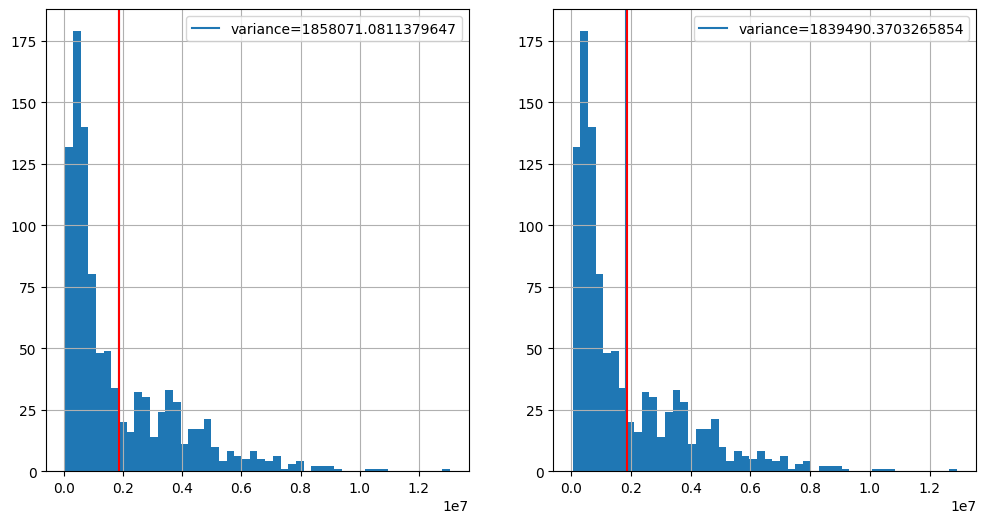

In [22]:
#Create two side by side subplots to compare the results of the biased and unbiased variance estimation
fig, (ax1, ax2)=plt.subplots(1 , 2, figsize=(12 , 6))

#__The left plot: histogram of the unbiased variance estimation
n , bins, pitches=ax1.hist(samples_unbiased_variances, bins=50)

     # Add a vertical line for the mean of the unbiased variance estimates
ax1.axvline(x=np.mean(samples_unbiased_variances), label=f"variance={np.mean(samples_unbiased_variances)}")
     # Add a red vertical line for the true population variance
ax1.axvline(x=variance_population, color='r')
ax1.legend()
ax1.grid()

#__The right plot: histogram of the biased variance estimation
n_ , bins_, pitches_=ax2.hist(samples_biased_variances, bins=50)

     # Add a vertical line for the mean of the biased variance estimates
ax2.axvline(x=np.mean(samples_biased_variances), label=f"variance={np.mean(samples_biased_variances)}")

     # Add a red vertical line for the true population variance
ax2.axvline(x=variance_population, color='r')
ax2.legend()
ax2.grid()